In [ ]:

### 1. Mount Google Drive ###

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### 2. Define root directory ###

ROOT_DIR = '/content/drive/MyDrive/CNN/'

In [ ]:

### 3. Install Ultralytics ###

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 15.1 MB/s eta 0:00:00


In [ ]:
!nproc

8


In [ ]:
!nvidia-smi

Thu Oct 24 18:25:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print(torch.cuda.is_available())  # Дасть True, якщо GPU доступний
print(torch.cuda.device_count())  # Кількість доступних GPU
print(torch.cuda.get_device_name(0))  # Назва першого GPU


True
1
Tesla T4


In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
### 4. Train model ###
%pip install ultralytics supervision roboflow
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

import os





Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/112.6 GB disk)


In [ ]:
import zipfile

# Шлях до архіву на Google Диску
dataset_zip_path = '/content/drive/MyDrive/CNN/Dataset_YOLO.zip'

# Розпаковка
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import os

# Шлях до папки з датасетом
dataset_path = "/content/Dataset_YOLO/train"

# Отримуємо список файлів у папці
files = sorted([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])

# Відокремлюємо зображення (припускаємо, що вони у форматі .jpg або .png)
image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Проходимо через список зображень і залишаємо лише кожне п'яте
for index, image_file in enumerate(image_files):
    if index % 5 != 0:  # Якщо це не п'яте зображення, видаляємо
        # Видаляємо зображення
        os.remove(os.path.join(dataset_path, image_file))

        # Видаляємо відповідний файл розмітки
        annotation_file = os.path.splitext(image_file)[0] + ".txt"
        annotation_path = os.path.join(dataset_path, annotation_file)
        if os.path.exists(annotation_path):
            os.remove(annotation_path)

print("Операція завершена. Лишились лише кожне п'яте фото та відповідна розмітка.")


Операція завершена. Лишились лише кожне п'яте фото та відповідна розмітка.


In [ ]:
import os

# Шлях до папки з датасетом
dataset_path = "/content/Dataset_YOLO/train"

# Отримуємо список файлів у папці
files = os.listdir(dataset_path)

# Фільтруємо лише файли зображень (припускаємо формати .jpg, .jpeg, .png)
image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Підрахунок зображень
image_count = len(image_files)

print(f"Кількість зображень у папці: {image_count}")


Кількість зображень у папці: 1786


In [ ]:
# Load a model
model = YOLO("yolo11n.pt")  # load an official model  # load pretrained model

# Use the model
results = model.train(
    data="/content/drive/MyDrive/CNN/google_colab_config.yaml",
    epochs=100,
    batch=72,
    workers=12,
    imgsz=640,  # Правильний аргумент для розміру зображення
    device="0",  # GPU
    patience=7,  # Цей параметр також може бути некоректним, але його слід перевірити
    name="yolo_experiment_2",
    verbose=True
)


New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/CNN/google_colab_config.yaml, epochs=100, time=None, patience=7, batch=72, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=12, project=None, name=yolo_experiment_23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

train: Scanning /content/Dataset_YOLO/train.cache... 1786 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1786/1786 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Dataset_YOLO/val.cache... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo_experiment_23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005625000000000001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_experiment_23
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.5G     0.9037      3.744      1.163        139        640: 100%|██████████| 25/25 [00:35<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:30<00:00,  1.92s/it]


                   all       2304       3048     0.0113      0.982      0.432      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        10G     0.8617      2.228      1.129        124        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:27<00:00,  1.71s/it]


                   all       2304       3048      0.999     0.0737      0.723       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.98G     0.8346      1.568      1.079        134        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


                   all       2304       3048      0.869      0.452      0.798      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        10G     0.8584      1.462      1.095        137        640: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.56s/it]


                   all       2304       3048      0.666      0.396      0.502      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        10G     0.8739      1.395      1.102        145        640: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.65s/it]


                   all       2304       3048      0.639      0.549      0.636      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.96G     0.8667      1.256      1.091        149        640: 100%|██████████| 25/25 [00:29<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.64s/it]


                   all       2304       3048      0.519      0.453      0.495      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.96G     0.8395      1.137      1.088        111        640: 100%|██████████| 25/25 [00:29<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.61s/it]


                   all       2304       3048      0.753      0.709      0.804      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.95G     0.8255      1.045      1.071        135        640: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]


                   all       2304       3048      0.804      0.675      0.763      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        10G     0.8002     0.9178      1.054        147        640: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]


                   all       2304       3048      0.885      0.831      0.923      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        10G     0.7872     0.8527      1.054        140        640: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.52s/it]

                   all       2304       3048      0.897      0.808      0.919      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.96G     0.7765     0.8224      1.051        139        640: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.45s/it]

                   all       2304       3048      0.895      0.812      0.904      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        10G     0.7686     0.7661      1.045        125        640: 100%|██████████| 25/25 [00:30<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.61s/it]

                   all       2304       3048      0.895      0.842      0.944      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.92G     0.7616     0.7325      1.043        147        640: 100%|██████████| 25/25 [00:29<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.66s/it]

                   all       2304       3048      0.929      0.886       0.96        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.96G     0.7378     0.7028      1.017        118        640: 100%|██████████| 25/25 [00:30<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all       2304       3048      0.936      0.895      0.958      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        10G     0.7321     0.6657       1.02        139        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]

                   all       2304       3048      0.939      0.879      0.966      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        10G     0.7319     0.6521      1.023        113        640: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       2304       3048      0.914      0.857      0.959      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.96G     0.7329      0.647      1.023        135        640: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.42s/it]

                   all       2304       3048      0.877      0.772      0.907      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.96G     0.7196      0.625      1.015        128        640: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]

                   all       2304       3048      0.899      0.858      0.944      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.97G     0.7083     0.6052      1.008        151        640: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.52s/it]

                   all       2304       3048      0.955      0.917      0.975      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.97G      0.696     0.5716      1.005        133        640: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.949      0.933      0.975      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.97G     0.6933     0.5802      1.004        140        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       2304       3048       0.95       0.91      0.978      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.95G     0.6721     0.5473     0.9955        126        640: 100%|██████████| 25/25 [00:30<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.50s/it]

                   all       2304       3048      0.973      0.963      0.989      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.97G     0.6961     0.5748       1.01        140        640: 100%|██████████| 25/25 [00:29<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.63s/it]

                   all       2304       3048      0.968       0.95      0.984      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        10G      0.678     0.5559     0.9985        132        640: 100%|██████████| 25/25 [00:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.68s/it]

                   all       2304       3048      0.944      0.914      0.965      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.97G     0.6578     0.5304     0.9949        126        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.63s/it]

                   all       2304       3048      0.958      0.951       0.98      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        10G     0.6656     0.5244     0.9911        140        640: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.57s/it]

                   all       2304       3048       0.97      0.958      0.987      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        10G     0.6649      0.515     0.9846        114        640: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048      0.971      0.947      0.987      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.97G      0.666     0.5153     0.9919        135        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048       0.95      0.922      0.973      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       9.9G     0.6528     0.5036     0.9916        116        640: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.982      0.977      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.97G     0.6494     0.4935     0.9867        147        640: 100%|██████████| 25/25 [00:32<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.44s/it]

                   all       2304       3048      0.922      0.865      0.964      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        10G     0.6517     0.4822      0.986        129        640: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.45s/it]

                   all       2304       3048      0.979      0.965      0.992      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.95G     0.6316     0.4689     0.9745        131        640: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048       0.98      0.968      0.988      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.94G     0.6518      0.491     0.9844        134        640: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.54s/it]

                   all       2304       3048      0.981      0.958      0.986      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.97G     0.6346     0.4626     0.9796        130        640: 100%|██████████| 25/25 [00:30<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.54s/it]

                   all       2304       3048      0.984      0.965       0.99      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.97G     0.6402     0.4667     0.9858        138        640: 100%|██████████| 25/25 [00:29<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all       2304       3048      0.976      0.977      0.992      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.97G     0.6137     0.4435     0.9636        119        640: 100%|██████████| 25/25 [00:29<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.65s/it]

                   all       2304       3048       0.98      0.979      0.991      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        10G     0.6287     0.4618     0.9845        136        640: 100%|██████████| 25/25 [00:29<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.60s/it]

                   all       2304       3048      0.977      0.979      0.992      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        10G     0.6181     0.4477     0.9709        143        640: 100%|██████████| 25/25 [00:29<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.56s/it]

                   all       2304       3048      0.988      0.984      0.994       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        10G     0.6092      0.431     0.9655        137        640: 100%|██████████| 25/25 [00:31<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.50s/it]

                   all       2304       3048       0.99      0.981      0.992      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.93G     0.6163     0.4461     0.9766        143        640: 100%|██████████| 25/25 [00:30<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.50s/it]

                   all       2304       3048      0.991      0.985      0.994      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100        10G     0.6045     0.4275     0.9661        135        640: 100%|██████████| 25/25 [00:30<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       2304       3048      0.975      0.965       0.99      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        10G     0.6017     0.4282     0.9656        140        640: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.987      0.974      0.991      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        10G     0.5902     0.4169     0.9634        139        640: 100%|██████████| 25/25 [00:31<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.39s/it]

                   all       2304       3048      0.982      0.978      0.992      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        10G     0.6021     0.4306     0.9642        132        640: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.985      0.984      0.993      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        10G        0.6     0.4247     0.9693        147        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.44s/it]

                   all       2304       3048      0.986      0.984      0.994      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.96G     0.5762     0.4067      0.955        141        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.988      0.986      0.994       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.92G     0.5869     0.4224     0.9639        152        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.39s/it]

                   all       2304       3048      0.987       0.99      0.994      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        10G     0.5832     0.4099     0.9572        141        640: 100%|██████████| 25/25 [00:31<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048       0.98      0.976      0.993      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.97G     0.5815        0.4     0.9525        144        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.989      0.984      0.993      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        10G     0.5756     0.4028     0.9564        134        640: 100%|██████████| 25/25 [00:31<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       2304       3048      0.991      0.989      0.994      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.97G     0.5699     0.4035      0.952        140        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all       2304       3048      0.993      0.986      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        10G     0.5734     0.4057     0.9595        130        640: 100%|██████████| 25/25 [00:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:27<00:00,  1.69s/it]

                   all       2304       3048      0.991      0.988      0.994      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.95G     0.5579     0.3829     0.9458        133        640: 100%|██████████| 25/25 [00:29<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.67s/it]

                   all       2304       3048      0.986      0.979      0.993      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.97G     0.5611     0.3784     0.9505        137        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.51s/it]

                   all       2304       3048      0.992      0.982      0.994      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        10G     0.5686     0.3819     0.9526        118        640: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]

                   all       2304       3048       0.99      0.987      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        10G     0.5581     0.3778     0.9515        159        640: 100%|██████████| 25/25 [00:32<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.50s/it]

                   all       2304       3048      0.989      0.989      0.994      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.95G     0.5551     0.3769       0.95        120        640: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.45s/it]

                   all       2304       3048      0.991      0.988      0.994      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        10G     0.5501     0.3699     0.9418        150        640: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.44s/it]

                   all       2304       3048      0.991      0.986      0.993      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        10G     0.5453     0.3638     0.9461        130        640: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048      0.995      0.987      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.98G     0.5446     0.3686      0.951        117        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.44s/it]

                   all       2304       3048      0.994      0.985      0.994      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.95G      0.547     0.3671     0.9362        131        640: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.43s/it]

                   all       2304       3048      0.994      0.992      0.994       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.97G     0.5473     0.3748     0.9438        139        640: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.992       0.99      0.994      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.93G     0.5374     0.3574     0.9448        125        640: 100%|██████████| 25/25 [00:31<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.54s/it]

                   all       2304       3048      0.993      0.992      0.994      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        10G     0.5357     0.3609     0.9396        127        640: 100%|██████████| 25/25 [00:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all       2304       3048      0.991      0.992      0.994      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.95G     0.5303     0.3604      0.937        120        640: 100%|██████████| 25/25 [00:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.56s/it]

                   all       2304       3048      0.993       0.99      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.91G     0.5304     0.3508     0.9355        123        640: 100%|██████████| 25/25 [00:29<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.62s/it]

                   all       2304       3048      0.995       0.99      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.92G     0.5367     0.3567     0.9352        112        640: 100%|██████████| 25/25 [00:29<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.61s/it]

                   all       2304       3048      0.993      0.992      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.95G     0.5231     0.3457     0.9337        115        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.53s/it]

                   all       2304       3048      0.994      0.992      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.97G     0.5289     0.3499     0.9335        124        640: 100%|██████████| 25/25 [00:30<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.995      0.989      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        10G     0.5165     0.3386     0.9275        154        640: 100%|██████████| 25/25 [00:30<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048      0.994      0.995      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.95G     0.5122     0.3432      0.931        125        640: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.993      0.993      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.95G     0.5065     0.3357     0.9317        126        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.40s/it]

                   all       2304       3048      0.994      0.989      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.95G     0.5219     0.3458     0.9389        148        640: 100%|██████████| 25/25 [00:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]

                   all       2304       3048      0.995      0.994      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.95G     0.5147     0.3309     0.9316        146        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.42s/it]

                   all       2304       3048      0.997      0.995      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        10G     0.5022     0.3241     0.9256        132        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.997      0.994      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        10G     0.4969     0.3208     0.9207        129        640: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.42s/it]

                   all       2304       3048      0.997      0.992      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.96G     0.4947      0.328     0.9248        125        640: 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.40s/it]

                   all       2304       3048      0.996      0.995      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.94G      0.492     0.3247     0.9303        130        640: 100%|██████████| 25/25 [00:31<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.45s/it]

                   all       2304       3048      0.997      0.993      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        10G     0.5003     0.3236     0.9263        146        640: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.38s/it]

                   all       2304       3048      0.996      0.995      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        10G     0.4973     0.3244     0.9306        144        640: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.996      0.995      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.93G     0.4821     0.3195     0.9167        129        640: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.42s/it]

                   all       2304       3048      0.996      0.995      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        10G     0.4692     0.3072     0.9168        130        640: 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.42s/it]

                   all       2304       3048      0.997      0.995      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        10G     0.4784     0.3102      0.912        125        640: 100%|██████████| 25/25 [00:30<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]

                   all       2304       3048      0.997      0.996      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.95G     0.4765     0.3034     0.9149        134        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.49s/it]

                   all       2304       3048      0.998      0.995      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.92G     0.4814     0.3044      0.922        139        640: 100%|██████████| 25/25 [00:29<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.54s/it]

                   all       2304       3048      0.996      0.995      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.97G     0.4866     0.3081     0.9238        125        640: 100%|██████████| 25/25 [00:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.59s/it]

                   all       2304       3048      0.998      0.995      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.97G     0.4706     0.3032     0.9162        127        640: 100%|██████████| 25/25 [00:29<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.66s/it]

                   all       2304       3048      0.998      0.997      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.94G     0.4762     0.3062     0.9145        131        640: 100%|██████████| 25/25 [00:29<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.64s/it]

                   all       2304       3048      0.997      0.996      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.94G     0.4743     0.3058      0.914        143        640: 100%|██████████| 25/25 [00:29<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.63s/it]

                   all       2304       3048      0.998      0.996      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        10G      0.461      0.296     0.9088        136        640: 100%|██████████| 25/25 [00:29<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.55s/it]

                   all       2304       3048      0.996      0.996      0.995      0.933


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.88G     0.3461      0.206     0.8255         76        640: 100%|██████████| 25/25 [00:36<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.996      0.995      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.88G     0.3415     0.2004     0.8175         74        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

                   all       2304       3048      0.997      0.993      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.88G     0.3384     0.1967     0.8208         70        640: 100%|██████████| 25/25 [00:30<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       2304       3048      0.995      0.995      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.95G     0.3364     0.1952     0.8115         78        640: 100%|██████████| 25/25 [00:30<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.50s/it]

                   all       2304       3048      0.996      0.996      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.88G     0.3296      0.192     0.8115         75        640: 100%|██████████| 25/25 [00:29<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       2304       3048      0.996      0.995      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.88G     0.3322     0.1923     0.8192         83        640: 100%|██████████| 25/25 [00:28<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.62s/it]

                   all       2304       3048      0.995      0.996      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.91G     0.3275      0.191     0.8151         78        640: 100%|██████████| 25/25 [00:27<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.64s/it]

                   all       2304       3048      0.996      0.995      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.91G      0.326     0.1873     0.8131         73        640: 100%|██████████| 25/25 [00:27<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.60s/it]

                   all       2304       3048      0.997      0.994      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.91G     0.3253     0.1854     0.8109         72        640: 100%|██████████| 25/25 [00:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.57s/it]

                   all       2304       3048      0.997      0.994      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.88G     0.3225     0.1857     0.8113         77        640: 100%|██████████| 25/25 [00:28<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.50s/it]

                   all       2304       3048      0.995      0.996      0.995      0.936



100 epochs completed in 1.572 hours.
Optimizer stripped from runs/detect/yolo_experiment_23/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo_experiment_23/weights/best.pt, 5.5MB

Validating runs/detect/yolo_experiment_23/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:28<00:00,  1.80s/it]


                   all       2304       3048      0.995      0.996      0.995      0.936
                 apple        364        433      0.998          1      0.995      0.926
                  bike        186        189      0.997          1      0.995      0.964
                bottle        376        633      0.994      0.992      0.995       0.87
                   box        355        478      0.997      0.994      0.995      0.943
                   car        332        409      0.999      0.998      0.995      0.916
                   cup        384        394      0.986      0.995      0.995       0.95
                laptop        216        216      0.998          1      0.995       0.99
                person        292        296      0.991      0.986      0.995      0.928
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/yolo_experiment_23


In [ ]:
!pip install torch onnx onnxruntime onnx-simplifier



In [ ]:
import torch
import onnx
from onnxsim import simplify

# Шлях до збереженої PyTorch моделі
pt_model_path = "/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best.pt"

# Завантажуємо модель YOLO з PyTorch
model = torch.load(pt_model_path, map_location=torch.device('cpu'))['model']
model.eval()  # Перемикаємо модель в режим інференсу

# Створюємо фіктивний вхід (dummy input) для експорту
dummy_input = torch.randn(1, 3, 640, 640)  # Вхідний розмір для YOLO (1 зображення, 3 канали, 640x640)

# Шлях для збереження ONNX моделі
onnx_model_path = "/content/best_model.onnx"

# Експортуємо модель у формат ONNX
torch.onnx.export(
    model,
    dummy_input,
    onnx_model_path,
    opset_version=11,  # Використовуємо версію Opset 11 для сумісності
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},  # Динамічний розмір батчу
)

print(f"Модель експортована у формат ONNX за шляхом {onnx_model_path}")

# Завантажуємо модель ONNX
onnx_model = onnx.load(onnx_model_path)

# Спрощуємо модель та знижуємо версію IR до 9
onnx_model_simplified, check = simplify(onnx_model, dynamic_input_shape=False, enable_fuse_bn=False)
onnx_model_simplified.ir_version = 9  # Зміна версії IR до 9

# Зберігаємо спрощену модель
simplified_onnx_model_path = "/content/best_model_ir9.onnx"
onnx.save(onnx_model_simplified, simplified_onnx_model_path)

print(f"Модель ONNX зі зниженою версією IR 9 збережена за шляхом {simplified_onnx_model_path}")


<ipython-input-3-42fd72db95cc>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(pt_model_path, map_location=torch.device('cpu'))['model']


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import shutil
from ultralytics import YOLO

# Шлях до натренованої моделі
model_path = "/content/runs/detect/yolo_experiment_1/weights/best.pt"  # використовується ваша кастомна модель

# Завантаження моделі
model = YOLO(model_path)

# Куди зберегти результат на Google Диску
google_drive_path = "/content/drive/MyDrive/MyResults"

# Експорт моделі в ONNX формат
print("Експортуємо модель в ONNX формат...")
onnx_model_path = model.export(format="onnx", imgsz=640)
onnx_save_path = f"{google_drive_path}/best_model.onnx"
shutil.copy(onnx_model_path, onnx_save_path)
print("ONNX модель успішно експортовано і скопійовано на Google Диск.")

# Експорт моделі в TensorRT формат
print("Експортуємо модель в TensorRT формат...")
tensorrt_model_path = model.export(format="engine", imgsz=640)
tensorrt_save_path = f"{google_drive_path}/best_model.engine"
shutil.copy(tensorrt_model_path, tensorrt_save_path)
print("TensorRT модель успішно експортовано і скопійовано на Google Диск.")

# Експорт моделі в TF Lite формат
print("Експортуємо модель в TF Lite формат...")
tflite_model_path = model.export(format="tflite", imgsz=640)
tflite_save_path = f"{google_drive_path}/best_model.tflite"
shutil.copy(tflite_model_path, tflite_save_path)
print("TF Lite модель успішно експортовано і скопійовано на Google Диск.")

# Експорт моделі в NCNN формат
print("Експортуємо модель в NCNN формат...")
ncnn_model_path = model.export(format="ncnn", imgsz=640)
ncnn_save_path = f"{google_drive_path}/best_model_ncnn"
shutil.copytree(ncnn_model_path, ncnn_save_path)
print("NCNN модель успішно експортовано і скопійовано на Google Диск.")


Експортуємо модель в TF Lite формат...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/yolo_experiment_1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (5.2 MB)
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 161.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.4s, installed 1 package: ['onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.17.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 1.8s, saved as '/content/runs/detect/yolo_experiment_1/we

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO("/content/drive/MyDrive/MyResults/detect/yolo_11person/weights/best.pt")

# Validate the model
metrics = model.val()
print(metrics.box.map)  # mAP50-95

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]
val: Scanning /content/Dataset_YOLO/val... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:01<00:00, 1866.85it/s]

val: New cache created: /content/Dataset_YOLO/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:26<00:00,  5.37it/s]


                   all       2304       3048      0.999          1      0.995      0.958
                 apple        364        433          1          1      0.995      0.945
                  bike        186        189      0.999          1      0.995      0.978
                bottle        376        633          1      0.997      0.995       0.91
                   box        355        478          1          1      0.995      0.962
                   car        332        409          1          1      0.995      0.951
                   cup        384        394          1          1      0.995       0.97
                laptop        216        216      0.999          1      0.995      0.992
                person        292        296      0.996          1      0.995      0.952
Speed: 0.4ms preprocess, 3.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2
0.9576167934950972


In [ ]:
!pip uninstall -y onnxruntime-tools onnxruntime
!pip install onnxruntime onnxruntime-gpu onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install onnx onnx-tf
!pip install onnx2tf
!pip install tensorrt trtexec


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.5/445.5 kB 14.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement trtexec (from versions: none)
ERROR: No matching distribution found for trtexec


In [ ]:
!pip install ncnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.2 MB/s eta 0:00:00


In [ ]:
import os
os.environ['PATH'] += ':/usr/src/tensorrt/bin'



In [ ]:
!tensorrt --help


/bin/bash: line 1: tensorrt: command not found


In [ ]:
import onnx
from onnxruntime import InferenceSession
from onnxruntime.transformers.float16 import convert_float_to_float16

# Завантажуємо модель у форматі float32
model_path = "/content/drive/MyDrive/MyResults/best_model.onnx"
model = onnx.load(model_path)

# Конвертація в float16
model_fp16 = convert_float_to_float16(model)

# Зберігаємо модель у float16
float16_model_path = "/content/drive/MyDrive/MyResults/float16/best_model_float16.onnx"
onnx.save_model(model_fp16, float16_model_path)

print(f"Модель успішно збережено у float16: {float16_model_path}")


Модель успішно збережено у float16: /content/drive/MyDrive/MyResults/float16/best_model_float16.onnx


In [ ]:
import tensorflow as tf

# Шлях до TensorFlow SavedModel
saved_model_dir = "/content/drive/MyDrive/MyResults/SavedModelT"

# Конвертер для TFLite з float16 квантуванням
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Конвертація у формат TFLite
tflite_model = converter.convert()

# Збереження моделі у форматі float16 TFLite
float16_model_path = "/content/drive/MyDrive/MyResults/float16/quantized_model_float16.tflite"
with open(float16_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Модель успішно збережено у TFLite float16: {float16_model_path}")


Модель успішно збережено у TFLite float16: /content/drive/MyDrive/MyResults/float16/quantized_model_float16.tflite


In [ ]:
import tensorrt as trt

# Створюємо логгер та будівельник
logger = trt.Logger(trt.Logger.WARNING)
builder = trt.Builder(logger)
network = builder.create_network(1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH))

# Завантажуємо ONNX-модель
onnx_model_path = "/content/drive/MyDrive/MyResults/best_model.onnx"
with open(onnx_model_path, "rb") as f:
    parser = trt.OnnxParser(network, logger)
    if not parser.parse(f.read()):
        print("Помилка при завантаженні моделі ONNX!")
        for error in range(parser.num_errors):
            print(parser.get_error(error))

# Оптимізація для float16
builder.max_workspace_size = 1 << 30  # Максимальний об'єм пам'яті
builder.fp16_mode = True  # Активуємо float16

# Створюємо модель TensorRT
engine = builder.build_cuda_engine(network)

# Зберігаємо модель у форматі TensorRT
engine_path = "/content/drive/MyDrive/MyResults/float16/quantized_model_float16.engine"
with open(engine_path, "wb") as f:
    f.write(engine.serialize())

print(f"Модель успішно збережено у форматі TensorRT float16: {engine_path}")


ModuleNotFoundError: No module named 'tensorrt'

In [ ]:
!trtexec --onnx=/content/drive/MyDrive/MyResults/best_model.onnx --saveEngine=/content/drive/MyDrive/MyResults/float16/quantized_model_float16.engine --fp16


&&&& RUNNING TensorRT.trtexec [TensorRT v100500] [b18] # trtexec --onnx=/content/drive/MyDrive/MyResults/best_model.onnx --saveEngine=/content/drive/MyDrive/MyResults/float16/quantized_model_float16.engine --fp16
[10/12/2024-17:20:16] [I] === Model Options ===
[10/12/2024-17:20:16] [I] Format: ONNX
[10/12/2024-17:20:16] [I] Model: /content/drive/MyDrive/MyResults/best_model.onnx
[10/12/2024-17:20:16] [I] Output:
[10/12/2024-17:20:16] [I] === Build Options ===
[10/12/2024-17:20:16] [I] Memory Pools: workspace: default, dlaSRAM: default, dlaLocalDRAM: default, dlaGlobalDRAM: default, tacticSharedMem: default
[10/12/2024-17:20:16] [I] avgTiming: 8
[10/12/2024-17:20:16] [I] Precision: FP32+FP16
[10/12/2024-17:20:16] [I] LayerPrecisions: 
[10/12/2024-17:20:16] [I] Layer Device Types: 
[10/12/2024-17:20:16] [I] Calibration: 
[10/12/2024-17:20:16] [I] Refit: Disabled
[10/12/2024-17:20:16] [I] Strip weights: Disabled
[10/12/2024-17:20:16] [I] Version Compatible: Disabled
[10/12/2024-17:20:16] 

In [ ]:
!trtexec --onnx=/content/drive/MyDrive/MyResults/best_model.onnx \
  --saveEngine=/content/drive/MyDrive/MyResults/int8/quantized_model_int8.engine \
  --int8


&&&& RUNNING TensorRT.trtexec [TensorRT v100500] [b18] # trtexec --onnx=/content/drive/MyDrive/MyResults/best_model.onnx --saveEngine=/content/drive/MyDrive/MyResults/int8/quantized_model_int8.engine --int8
[10/12/2024-17:51:25] [I] === Model Options ===
[10/12/2024-17:51:25] [I] Format: ONNX
[10/12/2024-17:51:25] [I] Model: /content/drive/MyDrive/MyResults/best_model.onnx
[10/12/2024-17:51:25] [I] Output:
[10/12/2024-17:51:25] [I] === Build Options ===
[10/12/2024-17:51:25] [I] Memory Pools: workspace: default, dlaSRAM: default, dlaLocalDRAM: default, dlaGlobalDRAM: default, tacticSharedMem: default
[10/12/2024-17:51:25] [I] avgTiming: 8
[10/12/2024-17:51:25] [I] Precision: FP32+INT8
[10/12/2024-17:51:25] [I] LayerPrecisions: 
[10/12/2024-17:51:25] [I] Layer Device Types: 
[10/12/2024-17:51:25] [I] Calibration: Dynamic
[10/12/2024-17:51:25] [I] Refit: Disabled
[10/12/2024-17:51:25] [I] Strip weights: Disabled
[10/12/2024-17:51:25] [I] Version Compatible: Disabled
[10/12/2024-17:51:25]

In [ ]:
import onnx

model_path = "/content/drive/MyDrive/MyResults/best_model.onnx"
model = onnx.load(model_path)

# Перевіряємо модель на наявність помилок
onnx.checker.check_model(model)
print("ONNX модель валідна")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MyResults/best_model.onnx'

In [ ]:
!git clone https://github.com/Tencent/ncnn.git
!cd ncnn
!mkdir build
!cd build
!cmake ..
!make -j$(nproc)
!sudo make install


fatal: destination path 'ncnn' already exists and is not an empty directory.
CMake Warning:
  Ignoring extra path from command line:

   ".."


CMake Error: The source directory "/" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.
make: *** No rule to make target 'install'.  Stop.


In [ ]:
# Тестуємо модель у форматі float16
!trtexec --loadEngine=/content/drive/MyDrive/MyResults/float16/quantized_model_float16.engine --iterations=100 --fp16

&&&& RUNNING TensorRT.trtexec [TensorRT v100500] [b18] # trtexec --loadEngine=/content/drive/MyDrive/MyResults/float16/quantized_model_float16.engine --iterations=100 --fp16
[10/12/2024-18:44:02] [I] === Model Options ===
[10/12/2024-18:44:02] [I] Format: *
[10/12/2024-18:44:02] [I] Model: 
[10/12/2024-18:44:02] [I] Output:
[10/12/2024-18:44:02] [I] 
[10/12/2024-18:44:02] [I] === System Options ===
[10/12/2024-18:44:02] [I] Device: 0
[10/12/2024-18:44:02] [I] DLACore: 
[10/12/2024-18:44:02] [I] Plugins:
[10/12/2024-18:44:02] [I] setPluginsToSerialize:
[10/12/2024-18:44:02] [I] dynamicPlugins:
[10/12/2024-18:44:02] [I] ignoreParsedPluginLibs: 0
[10/12/2024-18:44:02] [I] 
[10/12/2024-18:44:02] [I] === Inference Options ===
[10/12/2024-18:44:02] [I] Batch: Explicit
[10/12/2024-18:44:02] [I] Input inference shapes: model
[10/12/2024-18:44:02] [I] Iterations: 100
[10/12/2024-18:44:02] [I] Duration: 3s (+ 200ms warm up)
[10/12/2024-18:44:02] [I] Sleep time: 0ms
[10/12/2024-18:44:02] [I] Idle

In [ ]:
# Тестуємо модель у форматі int8
!trtexec --loadEngine=/content/drive/MyDrive/MyResults/int8/quantized_model_int8.engine --iterations=100 --fp16

&&&& RUNNING TensorRT.trtexec [TensorRT v100500] [b18] # trtexec --loadEngine=/content/drive/MyDrive/MyResults/int8/quantized_model_int8.engine --iterations=100 --fp16
[10/12/2024-17:57:52] [I] === Model Options ===
[10/12/2024-17:57:52] [I] Format: *
[10/12/2024-17:57:52] [I] Model: 
[10/12/2024-17:57:52] [I] Output:
[10/12/2024-17:57:52] [I] 
[10/12/2024-17:57:52] [I] === System Options ===
[10/12/2024-17:57:52] [I] Device: 0
[10/12/2024-17:57:52] [I] DLACore: 
[10/12/2024-17:57:52] [I] Plugins:
[10/12/2024-17:57:52] [I] setPluginsToSerialize:
[10/12/2024-17:57:52] [I] dynamicPlugins:
[10/12/2024-17:57:52] [I] ignoreParsedPluginLibs: 0
[10/12/2024-17:57:52] [I] 
[10/12/2024-17:57:52] [I] === Inference Options ===
[10/12/2024-17:57:52] [I] Batch: Explicit
[10/12/2024-17:57:52] [I] Input inference shapes: model
[10/12/2024-17:57:52] [I] Iterations: 100
[10/12/2024-17:57:52] [I] Duration: 3s (+ 200ms warm up)
[10/12/2024-17:57:52] [I] Sleep time: 0ms
[10/12/2024-17:57:52] [I] Idle time:

In [ ]:
import ncnn
import numpy as np
import cv2
import time
import os
import statistics
import matplotlib.pyplot as plt

# Функція для завантаження моделі NCNN
def load_ncnn_model(param_path, bin_path):
    net = ncnn.Net()  # Використовуємо Net для завантаження параметрів і моделі
    net.load_param(param_path)
    net.load_model(bin_path)
    return net

# Шляхи до NCNN моделі
ncnn_param_path = "/content/drive/MyDrive/MyResults/best_model_ncnn/model.ncnn.param"
ncnn_bin_path = "/content/drive/MyDrive/MyResults/best_model_ncnn/model.ncnn.bin"

# Шлях до зображень
image_dir = "/content/Dataset_YOLO/val"
image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))][:2000]

# Функція для підготовки зображення
def preprocess_image(image_path, input_size=(640, 640)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return None
    img = cv2.resize(img, input_size)
    img = img.astype(np.float32)
    img = img / 255.0
    return img

# Функція для виконання інференсу NCNN
def do_ncnn_inference(net, input_image, input_size=(640, 640)):
    mat_in = ncnn.Mat.from_pixels(input_image, ncnn.Mat.PixelType.PIXEL_BGR2RGB, input_size[0], input_size[1])

    ex = net.create_extractor()
    ex.input("input", mat_in)

    mat_out = ncnn.Mat()
    ex.extract("output", mat_out)

    return mat_out

# Функція для вимірювання часу обробки NCNN
def measure_ncnn_inference_time(param_path, bin_path, image_files, input_size=(640, 640), warmup_runs=5):
    net = load_ncnn_model(param_path, bin_path)
    inference_times = []

    # Прогрів моделі
    for _ in range(warmup_runs):
        input_image = preprocess_image(image_files[0], input_size)
        if input_image is None:
            continue
        do_ncnn_inference(net, input_image)

    # Тестування
    for img_path in image_files:
        input_image = preprocess_image(img_path, input_size)
        if input_image is None:
            continue
        start_time = time.time()
        do_ncnn_inference(net, input_image)
        inference_time = time.time() - start_time
        inference_times.append(inference_time * 1000)  # Перетворюємо в мілісекунди

    return inference_times

# Функція для підрахунку FPS
def calculate_fps(times):
    avg_time = statistics.mean(times)
    fps = 1000 / avg_time  # 1000 мс в секунду
    return fps

# Функція для виведення статистики разом із FPS
def print_statistics(times, model_name):
    avg_time = statistics.mean(times)
    fps = calculate_fps(times)
    print(f"Статистика для {model_name}:")
    print(f"Середній час обробки: {avg_time:.2f} мс")
    print(f"Медіанний час обробки: {statistics.median(times):.2f} мс")
    print(f"Мінімальний час обробки: {min(times):.2f} мс")
    print(f"Максимальний час обробки: {max(times):.2f} мс")
    print(f"Стандартне відхилення: {statistics.stdev(times):.2f} мс")
    print(f"FPS: {fps:.2f}\n")

# Тестуємо NCNN модель
print("Тестуємо NCNN модель...")
ncnn_times = measure_ncnn_inference_time(ncnn_param_path, ncnn_bin_path, image_files)
print_statistics(ncnn_times, "NCNN Float32")


Тестуємо NCNN модель...
Статистика для NCNN Float32:
Середній час обробки: 1.10 мс
Медіанний час обробки: 1.08 мс
Мінімальний час обробки: 0.98 мс
Максимальний час обробки: 1.69 мс
Стандартне відхилення: 0.08 мс
FPS: 906.27



In [ ]:
import onnxruntime as ort
import numpy as np
import cv2
import time
import os
import statistics

# Функція для завантаження моделі ONNX
def load_onnx_model(model_path):
    return ort.InferenceSession(model_path)

# Шлях до моделі ONNX
onnx_model_path = "/content/drive/MyDrive/MyResults/best_model.onnx"  # Замініть на шлях до вашої моделі

# Шлях до зображень
image_dir = "/content/Dataset_YOLO/val"  # Замініть на шлях до ваших зображень
image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))][:100]

# Функція для підготовки зображення
def preprocess_image(image_path, input_size=(640, 640)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return None
    img = cv2.resize(img, input_size)
    img = img.astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Змінюємо розміщення каналів на (C, H, W)
    img = np.expand_dims(img, axis=0)  # Додаємо додаткову вісь для батчу
    return img

# Функція для виконання інференсу ONNX
def do_onnx_inference(onnx_session, input_image):
    input_name = onnx_session.get_inputs()[0].name
    return onnx_session.run(None, {input_name: input_image})

# Функція для вимірювання часу інференсу ONNX
def measure_onnx_inference_time(onnx_model_path, image_files, input_size=(640, 640), warmup_runs=5):
    session = load_onnx_model(onnx_model_path)
    inference_times = []

    # Прогрів моделі
    for _ in range(warmup_runs):
        input_image = preprocess_image(image_files[0], input_size)
        if input_image is None:
            continue
        do_onnx_inference(session, input_image)

    # Тестування
    for img_path in image_files:
        input_image = preprocess_image(img_path, input_size)
        if input_image is None:
            continue
        start_time = time.time()
        do_onnx_inference(session, input_image)
        inference_time = time.time() - start_time
        inference_times.append(inference_time * 1000)  # Перетворюємо в мілісекунди

    return inference_times

# Функція для підрахунку FPS
def calculate_fps(times):
    avg_time = statistics.mean(times)
    fps = 1000 / avg_time  # 1000 мс в секунду
    return fps

# Функція для виведення статистики разом із FPS
def print_statistics(times, model_name):
    avg_time = statistics.mean(times)
    fps = calculate_fps(times)
    print(f"Статистика для {model_name}:")
    print(f"Середній час обробки: {avg_time:.2f} мс")
    print(f"Медіанний час обробки: {statistics.median(times):.2f} мс")
    print(f"Мінімальний час обробки: {min(times):.2f} мс")
    print(f"Максимальний час обробки: {max(times):.2f} мс")
    print(f"Стандартне відхилення: {statistics.stdev(times):.2f} мс")
    print(f"FPS: {fps:.2f}\n")

# Тестуємо модель ONNX
print("Тестуємо ONNX модель...")
onnx_times = measure_onnx_inference_time(onnx_model_path, image_files)
print_statistics(onnx_times, "ONNX Model")


Тестуємо ONNX модель...
Статистика для ONNX Model:
Середній час обробки: 47.56 мс
Медіанний час обробки: 46.88 мс
Мінімальний час обробки: 44.33 мс
Максимальний час обробки: 58.86 мс
Стандартне відхилення: 2.43 мс
FPS: 21.03



In [ ]:
from deepsparse import Pipeline

# Specify the path to your YOLO11 ONNX model
model_path = "/content/drive/MyDrive/MyResults/best_model_ir9.onnx"

# Set up the DeepSparse Pipeline
yolo_pipeline = Pipeline.create(task="yolov8", model_path=model_path)

# Run the model on your images
images = ["/content/Dataset_YOLO/val/152222_1.jpg"]
pipeline_outputs = yolo_pipeline(images=images)

2024-10-13 15:18:21 deepsparse.pipeline WARNING  Could not create v2 'yolov8' pipeline, trying legacy


In [ ]:
!pip install deepsparse[server,yolo,onnxruntime]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install sparseml


In [ ]:

!yolo export model=/content/best.pt format=onnx opset=13


Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (AMD EPYC 7B12)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (5.2 MB)
requirements: Ultralytics requirement ['onnxslim==0.1.34'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 4.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.7s, installed 1 package: ['onnxslim==0.1.34']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 13...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 4.4s, saved as '/content/best.onnx' (10.1 MB)

Export complete (6.0s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/best.onnx imgsz=640 data=/content/drive

In [ ]:
import os
import time
from deepsparse import Pipeline
import cv2

# Вкажіть шлях до вашої ONNX моделі
model_path = "/content/drive/MyDrive/MyResults/best_model_ir9.onnx"

# Створіть DeepSparse pipeline
pipeline = Pipeline.create(task="yolo", model_path=model_path)

# Шлях до папки із зображеннями
image_dir = "/content/Dataset_YOLO/val"

# Отримуємо список зображень (візьмемо, наприклад, 200 зображень)
image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))][:1000]

# Функція для підготовки зображення
def preprocess_image(image_path, input_size=(640, 640)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return None
    img = cv2.resize(img, input_size)
    img = img.astype("float32") / 255.0
    return img

# Прогріваємо модель (виконаємо кілька інференсів для розігріву)
print("Прогріваємо модель...")
for i in range(5):
    input_image = preprocess_image(image_files[0])
    if input_image is None:
        continue
    output = pipeline(images=[input_image])

# Тестування швидкості на вибраних зображеннях
print("Тестуємо швидкість моделі на 200 зображеннях...")
num_iterations = len(image_files)
start_time = time.time()

for img_path in image_files:
    input_image = preprocess_image(img_path)
    if input_image is None:
        continue
    output = pipeline(images=[input_image])

end_time = time.time()
total_time = end_time - start_time

# Обчислення FPS
fps = num_iterations / total_time
print(f"FPS: {fps:.2f}")


2024-10-14 10:49:41 deepsparse.pipeline WARNING  Could not create v2 'yolo' pipeline, trying legacy


Прогріваємо модель...
Тестуємо швидкість моделі на 200 зображеннях...
FPS: 26.27


In [ ]:
!pip install deepsparse


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Завантажуємо ONNX модель
model = YOLO("/content/drive/MyDrive/MyResults/best_model_ir9.onnx")

# Валідація моделі на тестовому наборі даних
results = model.val(data="/content/drive/MyDrive/CNN/google_colab_config.yaml")


# Виведення результатів
print(f"mAP50-95: {results.box.map}")  # mAP для всіх класів на порозі 50-95
print(f"Точність для кожного класу: {results.box.ap_class}")  # Точність для кожного класу


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (AMD EPYC 7B12)
Loading /content/drive/MyDrive/MyResults/best_model_ir9.onnx for ONNX Runtime inference...
Setting batch=1 input of shape (1, 3, 640, 640)


100%|██████████| 755k/755k [00:00<00:00, 4.69MB/s]
val: Scanning /content/Dataset_YOLO/val... 2011 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2011/2011 [00:02<00:00, 708.59it/s]

val: New cache created: /content/Dataset_YOLO/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2011/2011 [03:17<00:00, 10.19it/s]


                   all       2011       2552      0.999          1      0.995      0.959
                 apple        327        396          1          1      0.995      0.946
                  bike        186        189      0.999          1      0.995      0.974
                bottle        348        605          1          1      0.995      0.912
                   box        286        409          1      0.998      0.995      0.964
                   car        332        409          1          1      0.995      0.945
                   cup        318        328      0.999          1      0.995      0.977
                laptop        216        216      0.999          1      0.995      0.992
Speed: 0.4ms preprocess, 73.9ms inference, 0.0ms loss, 16.7ms postprocess per image
Results saved to runs/detect/val
mAP50-95: 0.9586327351832359


AttributeError: 'Metric' object has no attribute 'ap_class'. See valid attributes below.

    Class for computing evaluation metrics for YOLOv8 model.

    Attributes:
        p (list): Precision for each class. Shape: (nc,).
        r (list): Recall for each class. Shape: (nc,).
        f1 (list): F1 score for each class. Shape: (nc,).
        all_ap (list): AP scores for all classes and all IoU thresholds. Shape: (nc, 10).
        ap_class_index (list): Index of class for each AP score. Shape: (nc,).
        nc (int): Number of classes.

    Methods:
        ap50(): AP at IoU threshold of 0.5 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        ap(): AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        mp(): Mean precision of all classes. Returns: Float.
        mr(): Mean recall of all classes. Returns: Float.
        map50(): Mean AP at IoU threshold of 0.5 for all classes. Returns: Float.
        map75(): Mean AP at IoU threshold of 0.75 for all classes. Returns: Float.
        map(): Mean AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: Float.
        mean_results(): Mean of results, returns mp, mr, map50, map.
        class_result(i): Class-aware result, returns p[i], r[i], ap50[i], ap[i].
        maps(): mAP of each class. Returns: Array of mAP scores, shape: (nc,).
        fitness(): Model fitness as a weighted combination of metrics. Returns: Float.
        update(results): Update metric attributes with new evaluation results.
    

In [ ]:
print(f"Точність для кожного класу: {results.box.f1  }")

Точність для кожного класу: [    0.99976     0.99935     0.99982      0.9992     0.99983     0.99964     0.99958]


In [ ]:
!mo --input_model /content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best.onnx --output_dir /content/drive/MyDrive/MyResults/openvino_model


[ INFO ] MO command line tool is considered as the legacy conversion API as of OpenVINO 2023.2 release.
In 2025.0 MO command line tool and openvino.tools.mo.convert_model() will be removed. Please use OpenVINO Model Converter (OVC) or openvino.convert_model(). OVC represents a lightweight alternative of MO and provides simplified model conversion API. 
Find more information about transition from MO to OVC at https://docs.openvino.ai/2023.2/openvino_docs_OV_Converter_UG_prepare_model_convert_model_MO_OVC_transition.html
[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression explicitly by adding argument --compress_to_fp16=False.
Find more information about compression to FP16 at https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_FP16_Compression.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /content/drive/MyDrive/MyResults/openvino_model/best.xml
[ SUCCESS ] BIN file: /content/drive/MyDrive/MyResults/op

In [ ]:
from openvino.tools.mo import convert_model
from openvino.runtime import serialize

# Шлях до ONNX моделі
onnx_model_path = "/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best.onnx"

# Конвертація моделі в OpenVINO IR з FP16
openvino_model = convert_model(
    onnx_model_path,
    compress_to_fp16=True  # Використовуємо FP16 для зменшення моделі
)

# Збереження конвертованої моделі у формат FP16
serialize(openvino_model, "/content/drive/MyDrive/MyResults/openvino_model_fp16/best_fp16.xml", "/content/drive/MyDrive/MyResults/openvino_model_fp16/best_fp16.bin")


[ INFO ] MO command line tool is considered as the legacy conversion API as of OpenVINO 2023.2 release.
In 2025.0 MO command line tool and openvino.tools.mo.convert_model() will be removed. Please use OpenVINO Model Converter (OVC) or openvino.convert_model(). OVC represents a lightweight alternative of MO and provides simplified model conversion API. 
Find more information about transition from MO to OVC at https://docs.openvino.ai/2023.2/openvino_docs_OV_Converter_UG_prepare_model_convert_model_MO_OVC_transition.html


In [ ]:
!pip install openvino-dev[onnx]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: fastjsonschema
    Found existing installation: fastjsonschema 2.20.0
    Uninstalling fastjsonschema-2.20.0:
      Successfully uninstalled fastjsonschema-2.20.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
import time
import cv2
import numpy as np
from openvino.runtime import Core
import os
from glob import glob

# Шляхи до файлів моделі OpenVINO IR
model_xml = "/content/drive/MyDrive/MyResults/openvino_model_fp16/best_fp16.xml"
model_bin = "/content/drive/MyDrive/MyResults/openvino_model_fp16/best_fp16.bin"

# Завантаження моделі
ie = Core()
model = ie.read_model(model=model_xml, weights=model_bin)
compiled_model = ie.compile_model(model=model, device_name="CPU")

# Отримання імен вхідних і вихідних шарів
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# Шлях до папки із зображеннями
image_folder_path = "/content/Dataset_YOLO/val/"

# Отримання всіх зображень з папки
image_paths = glob(os.path.join(image_folder_path, "*.jpg"))

# Кількість зображень і підготовка до вимірювання часу
num_iterations = len(image_paths)  # Виконати інференс для кожного зображення
total_time = 0

# Виконання інференсу для кожного зображення і вимірювання часу
for image_path in image_paths:
    # Завантаження і обробка зображення
    image = cv2.imread(image_path)
    image = cv2.resize(image, (640, 640))  # Змінюємо розмір зображення для моделі
    input_image = np.expand_dims(image.transpose(2, 0, 1), axis=0)  # HWC to CHW, додавання batch розміру

    # Вимірювання часу інференсу
    start_time = time.time()
    results = compiled_model([input_image])  # Інференс
    end_time = time.time()

    total_time += (end_time - start_time)

# Виведення середнього часу інференсу
average_time_per_inference = total_time / num_iterations
fps = 1 / average_time_per_inference

print(f"Середній час інференсу: {average_time_per_inference:.6f} секунд")
print(f"FPS (кількість кадрів на секунду): {fps:.2f}")


Середній час інференсу: 0.040624 секунд
FPS (кількість кадрів на секунду): 24.62


In [ ]:
!pip install ncnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.3 MB/s eta 0:00:00


In [ ]:
import time
import cv2
import os
import ncnn
import numpy as np

# Шляхи до NCNN моделі
param_path = "/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model/best.ncnn.param"
bin_path = "/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model/best.ncnn.bin"

# Завантаження моделі NCNN
net = ncnn.Net()
net.load_param(param_path)
net.load_model(bin_path)

# Функція для інференсу на зображенні
def perform_inference(image_path, net):
    image = cv2.imread(image_path)

    # Перетворення зображення у формат NCNN (BGR)
    ncnn_input = ncnn.Mat.from_pixels(image, ncnn.Mat.PixelType.PIXEL_BGR, image.shape[1], image.shape[0])

    extractor = net.create_extractor()
    extractor.input("input", ncnn_input)

    # Отримуємо результати інференсу
    output = ncnn.Mat()
    extractor.extract("output", output)  # Замініть "output" на ім'я вихідного шару вашої моделі
    return output

# Тест на швидкість
def test_model_speed(image_paths, net, num_iterations=100):
    times = []

    for i in range(num_iterations):
        start_time = time.time()
        for image_path in image_paths:
            perform_inference(image_path, net)
        end_time = time.time()

        times.append((end_time - start_time) / len(image_paths))

    # Обчислення статистики часу
    avg_time_per_inference = np.mean(times) * 1000  # у мілісекундах
    median_time_per_inference = np.median(times) * 1000  # у мілісекундах
    min_time_per_inference = np.min(times) * 1000  # у мілісекундах
    max_time_per_inference = np.max(times) * 1000  # у мілісекундах
    std_dev_time_per_inference = np.std(times) * 1000  # у мілісекундах
    fps = 1000 / avg_time_per_inference

    # Вивід результатів
    print(f"Середній час обробки: {avg_time_per_inference:.2f} мс")
    print(f"Медіанний час обробки: {median_time_per_inference:.2f} мс")
    print(f"Мінімальний час обробки: {min_time_per_inference:.2f} мс")
    print(f"Максимальний час обробки: {max_time_per_inference:.2f} мс")
    print(f"Стандартне відхилення: {std_dev_time_per_inference:.2f} мс")
    print(f"FPS: {fps:.2f}")

# Шлях до папки з тестовими зображеннями
image_folder = "/content/Dataset_YOLO/val"
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(".jpg")][:300]

# Запуск тесту
test_model_speed(image_paths, net)

Середній час обробки: 2.90 мс
Медіанний час обробки: 2.88 мс
Мінімальний час обробки: 2.77 мс
Максимальний час обробки: 3.09 мс
Стандартне відхилення: 0.08 мс
FPS: 345.05


In [ ]:
!pip install supervision-0.24.0.

ERROR: Invalid requirement: 'supervision-0.24.0.': Expected end or semicolon (after name and no valid version specifier)
    supervision-0.24.0.
                      ^


Loading /content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model for NCNN inference...
requirements: Ultralytics requirement ['ncnn'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 62.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.3s, installed 1 package: ['ncnn']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x640 1 bike, 114.2ms
Speed: 75.8ms preprocess, 114.2ms inference, 77.4ms postprocess per image at shape (1, 3, 640, 640)


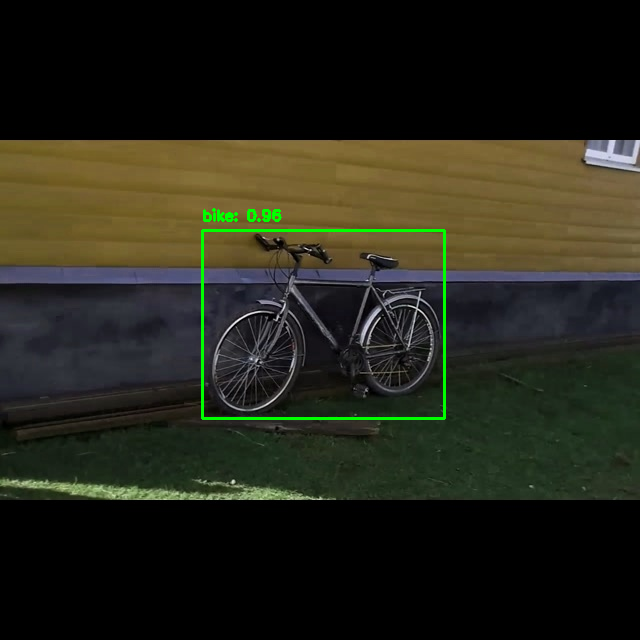

Знайдені класи: bike

0: 640x640 2 cars, 74.7ms
Speed: 17.9ms preprocess, 74.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


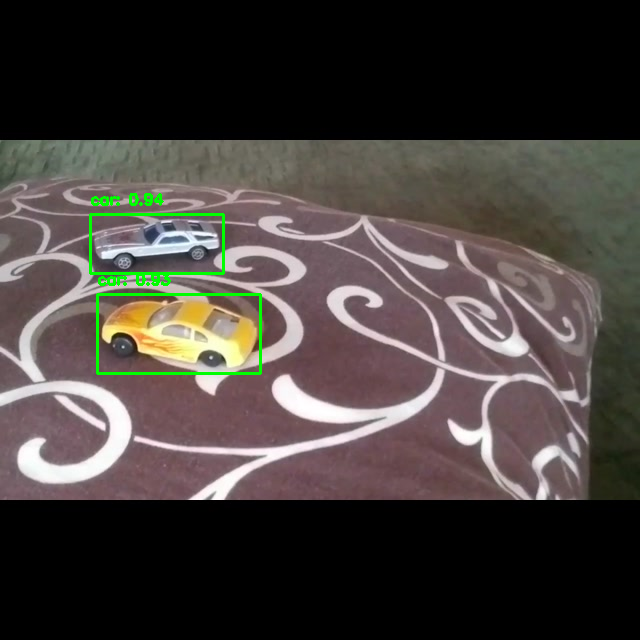

Знайдені класи: car


In [ ]:
import time
import cv2
import os
import torch
import numpy as np
from google.colab.patches import cv2_imshow

# /content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best.pt
# /content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model

model = YOLO("/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model")

# Список класів
class_names = model.names

# Функція для інференсу на зображенні та малювання результатів
def perform_inference_and_draw(image_path, model):
    image = cv2.imread(image_path)

    # Перевірка, чи завантажено зображення
    if image is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return

    # Виконання інференсу за допомогою PyTorch моделі
    results = model(image)[0]

    # Отримання інформації про детекції
    boxes = results.boxes.xyxy.cpu().numpy()  # Координати рамок [x1, y1, x2, y2]
    scores = results.boxes.conf.cpu().numpy()  # Впевненість
    class_ids = results.boxes.cls.cpu().numpy().astype(int)  # Ідентифікатори класів

    detected_classes = set()

    # Перебір кожної детекції
    for box, score, class_id in zip(boxes, scores, class_ids):
        x1, y1, x2, y2 = map(int, box)

        # Фільтруємо результати з низькою впевненістю
        if score > 0.01:
            # Визначаємо назву класу або позначаємо як невідомий клас
            class_name = class_names[class_id] if class_id < len(class_names) else f"unknown_class_{class_id}"
            # Додаємо клас до списку знайдених
            detected_classes.add(class_name)
            # Малюємо рамку та підпис
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{class_name}: {score:.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Виведення зображення з результатами
    cv2_imshow(image)
    # Виведення знайдених класів
    if detected_classes:
        print(f"Знайдені класи: {', '.join(detected_classes)}")
    else:
        print("Знайдені класи: немає")

# Виведення зображень із детекцією
image_paths = ["/content/Dataset_YOLO/val/1727865004084_23_flipped_color_aug.jpg", "/content/Dataset_YOLO/val/152222_1.jpg"]
for image_path in image_paths:
    perform_inference_and_draw(image_path, model)

In [ ]:
!pip show ultralytics
!pip show torch


Name: ultralytics
Version: 8.3.18
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 
Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, timm, torchaudio, torchvision, ultralytics, ultralytics-thop


In [ ]:
from ultralytics import YOLO

# Load the YOLO11 model
#model = YOLO("/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best.pt")

# Export the model to NCNN format
#model.export(format="ncnn")  # creates '/yolo11n_ncnn_model'

# Load the exported NCNN model
ncnn_model = YOLO("/content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model")

# Run inference
results = ncnn_model("/content/Dataset_YOLO/val/1727865004084_23_flipped_color_aug.jpg")

Loading /content/drive/MyDrive/MyResults/detect/yolo_experiment_1/weights/best_ncnn_model for NCNN inference...

image 1/1 /content/Dataset_YOLO/val/1727865004084_23_flipped_color_aug.jpg: 640x640 1 bike, 117.0ms
Speed: 3.3ms preprocess, 117.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.cls

tensor([1.])

In [ ]:
import shutil
import os

# Шлях до папки, яку потрібно видалити
folder_path = "/content/runs"

# Перевірка, чи існує папка
if os.path.exists(folder_path):
    # Видаляємо папку та всі її вміст
#########################################    shutil.rmtree(folder_path)
    print(f"Папка {folder_path} успішно видалена.")
else:
    print(f"Папка {folder_path} не знайдена.")


In [ ]:
import torch
import cv2
import os
import time

# Шлях до моделі та папки із зображеннями
model_path = "/content/best.pt"  # Шлях до вашої моделі YOLOv8n
image_folder = "/content/Dataset_YOLO/val"  # Папка із зображеннями для тестування

# Завантаження моделі YOLOv8 через PyTorch
model = torch.hub.load('ultralytics/yolov8', 'custom', path=model_path)

# Отримуємо список файлів зображень (тільки .jpg)
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Обмежуємо кількість зображень для тестування (наприклад, 10 для швидкого тесту)
image_files = image_files[:10]  # Ви можете змінити це значення для більшої кількості зображень

# Початок заміру часу
start_time = time.time()

# Перебір та обробка кожного зображення
for image_path in image_files:
    # Завантажуємо зображення за допомогою OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        continue

    # Виконуємо інференс
    results = model(image)

    # (Опційно) Якщо потрібно, можна вивести результати або зберегти
    # results.show()  # Вивести зображення з рамками та детекціями

# Кінець заміру часу
end_time = time.time()

# Розрахунок середнього часу обробки одного зображення
total_time = end_time - start_time
average_time_per_image = total_time / len(image_files)

# Виведення результатів
print(f"Загальний час для {len(image_files)} зображень: {total_time:.2f} секунд")
print(f"Середній час для одного зображення: {average_time_per_image * 1000:.2f} мс")


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


HTTPError: HTTP Error 404: Not Found

In [ ]:
import onnxruntime as ort
import numpy as np
import cv2
import time
import os
import statistics
import tensorflow as tf

# Функція для завантаження моделі ONNX
def load_onnx_model(model_path):
    return ort.InferenceSession(model_path)

# Функція для завантаження моделі TFLite
def load_tflite_model(model_path):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

# Функція для отримання деталей вводу та виводу TFLite моделі
def get_tflite_details(interpreter):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    return input_details, output_details

# Шлях до моделей
onnx_model_path = "/content/drive/MyDrive/MyResults/best_model.onnx"  # Замініть на шлях до вашої ONNX моделі
tflite_model_path = "/content/drive/MyDrive/MyResults/best_model.tflite"  # Замініть на шлях до вашої TFLite моделі

# Шлях до зображень
image_dir = "/content/Dataset_YOLO/val"  # Замініть на шлях до ваших зображень
image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))][:100]

# Функція для підготовки зображення
def preprocess_image(image_path, input_size=(640, 640)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return None
    img = cv2.resize(img, input_size)
    img = img.astype(np.float32)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Змінюємо розміщення каналів на (C, H, W)
    img = np.expand_dims(img, axis=0)  # Додаємо додаткову вісь для батчу
    return img



# Функція для підготовки зображення для TFLite
def preprocess_image_tflite(image_path, input_size=(640, 640)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Не вдалося завантажити зображення: {image_path}")
        return None
    img = cv2.resize(img, input_size)
    img = img.astype(np.float32)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Додаємо додаткову вісь для батчу
    return img  # Форма повинна бути (1, 640, 640, 3)


# Функція для виконання інференсу ONNX
def do_onnx_inference(onnx_session, input_image):
    input_name = onnx_session.get_inputs()[0].name
    return onnx_session.run(None, {input_name: input_image})

# Функція для виконання інференсу TFLite
def do_tflite_inference(interpreter, input_image, input_details, output_details):
    # Підготовка вводу
    input_shape = input_details[0]['shape']
    input_data = np.array(input_image, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Виконання інференсу
    interpreter.invoke()

    # Отримання результатів
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Функція для вимірювання часу інференсу ONNX
def measure_onnx_inference_time(onnx_model_path, image_files, input_size=(640, 640), warmup_runs=5):
    session = load_onnx_model(onnx_model_path)
    inference_times = []

    # Прогрів моделі
    for _ in range(warmup_runs):
        input_image = preprocess_image(image_files[0], input_size)
        if input_image is None:
            continue
        do_onnx_inference(session, input_image)

    # Тестування
    for img_path in image_files:
        input_image = preprocess_image(img_path, input_size)
        if input_image is None:
            continue
        start_time = time.time()
        do_onnx_inference(session, input_image)
        inference_time = time.time() - start_time
        inference_times.append(inference_time * 1000)  # Перетворюємо в мілісекунди

    return inference_times

# Функція для вимірювання часу інференсу TFLite
def measure_tflite_inference_time(tflite_model_path, image_files, input_size=(640, 640), warmup_runs=5):
    interpreter = load_tflite_model(tflite_model_path)
    input_details, output_details = get_tflite_details(interpreter)
    inference_times = []

    # Прогрів моделі
    for _ in range(warmup_runs):
        input_image = preprocess_image_tflite(image_files[0], input_size)  # Використовуємо нову функцію
        if input_image is None:
            continue
        do_tflite_inference(interpreter, input_image, input_details, output_details)

    # Тестування
    for img_path in image_files:
        input_image = preprocess_image_tflite(img_path, input_size)  # Використовуємо нову функцію
        if input_image is None:
            continue
        start_time = time.time()
        do_tflite_inference(interpreter, input_image, input_details, output_details)
        inference_time = time.time() - start_time
        inference_times.append(inference_time * 1000)  # Перетворюємо в мілісекунди

    return inference_times


# Функція для підрахунку FPS
def calculate_fps(times):
    avg_time = statistics.mean(times)
    fps = 1000 / avg_time  # 1000 мс в секунду
    return fps

# Функція для виведення статистики разом із FPS
def print_statistics(times, model_name):
    avg_time = statistics.mean(times)
    fps = calculate_fps(times)
    print(f"Статистика для {model_name}:")
    print(f"Середній час обробки: {avg_time:.2f} мс")
    print(f"Медіанний час обробки: {statistics.median(times):.2f} мс")
    print(f"Мінімальний час обробки: {min(times):.2f} мс")
    print(f"Максимальний час обробки: {max(times):.2f} мс")
    if len(times) > 1:
        print(f"Стандартне відхилення: {statistics.stdev(times):.2f} мс")
    else:
        print(f"Стандартне відхилення: Немає достатньо даних")
    print(f"FPS: {fps:.2f}\n")

# Тестуємо модель ONNX
print("Тестуємо ONNX модель...")
onnx_times = measure_onnx_inference_time(onnx_model_path, image_files)
print_statistics(onnx_times, "ONNX Model")

# Тестуємо модель TFLite
print("Тестуємо TFLite модель...")
tflite_times = measure_tflite_inference_time(tflite_model_path, image_files)
print_statistics(tflite_times, "TFLite Model")


Тестуємо ONNX модель...
Статистика для ONNX Model:
Середній час обробки: 85.02 мс
Медіанний час обробки: 85.16 мс
Мінімальний час обробки: 81.44 мс
Максимальний час обробки: 89.46 мс
Стандартне відхилення: 1.54 мс
FPS: 11.76

Тестуємо TFLite модель...
Статистика для TFLite Model:
Середній час обробки: 138.36 мс
Медіанний час обробки: 137.73 мс
Мінімальний час обробки: 132.98 мс
Максимальний час обробки: 149.27 мс
Стандартне відхилення: 3.58 мс
FPS: 7.23



In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00
